# tldr;
## data cleaning :
- removed null column
- removed 100 duplicates
- corrected Follower following ratio column

## Assumptions
- influencers are accounts with lots of followers (> 7.5k)
- bots are accounts that raise any of the following flags:
    - too many avg likes, posts, comments per day
    - too much following to follower ratio

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

dataset_path = os.path.join("." ,"DataSet_Original.xlsx")
df = pd.read_excel(dataset_path)

df.head()

,User_ID,Num_Posts,Avg_Likes,Avg_Comments,Time_Between_Posts,Followers,Following,Follower_Following_Ratio,Sentiment_Score,Profile_Age_Days,Null_Column
0,1001,861,244,444,122,2785,6052,38.3266,0.32,872,NaN
1,1002,3773,537,92,544,7403,3844,35.1057,-0.92,835,NaN
2,1003,3093,602,437,222,1593,1263,16.5683,-0.26,2823,NaN
3,1004,467,75,446,631,2373,7614,33.7835,0.96,919,NaN
4,1005,4427,806,206,39,5794,8711,19.7975,-0.16,1725,NaN


## Removal of useless column

In [2]:
df.drop(columns=['Null_Column'], inplace=True)
df.columns

Index(['User_ID', 'Num_Posts', 'Avg_Likes', 'Avg_Comments',
       'Time_Between_Posts', 'Followers', 'Following',
       'Follower_Following_Ratio', 'Sentiment_Score', 'Profile_Age_Days'],
      dtype='object')

In [3]:
df.isnull().sum()

User_ID                     0
Num_Posts                   0
Avg_Likes                   0
Avg_Comments                0
Time_Between_Posts          0
Followers                   0
Following                   0
Follower_Following_Ratio    0
Sentiment_Score             0
Profile_Age_Days            0
dtype: int64

In [4]:
df.columns

Index(['User_ID', 'Num_Posts', 'Avg_Likes', 'Avg_Comments',
       'Time_Between_Posts', 'Followers', 'Following',
       'Follower_Following_Ratio', 'Sentiment_Score', 'Profile_Age_Days'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   1100 non-null   int64  
 1   Num_Posts                 1100 non-null   int64  
 2   Avg_Likes                 1100 non-null   int64  
 3   Avg_Comments              1100 non-null   int64  
 4   Time_Between_Posts        1100 non-null   int64  
 5   Followers                 1100 non-null   int64  
 6   Following                 1100 non-null   int64  
 7   Follower_Following_Ratio  1100 non-null   float64
 8   Sentiment_Score           1100 non-null   float64
 9   Profile_Age_Days          1100 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 86.1 KB


In [6]:
df.describe()

,User_ID,Num_Posts,Avg_Likes,Avg_Comments,Time_Between_Posts,Followers,Following,Follower_Following_Ratio,Sentiment_Score,Profile_Age_Days
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.00000,1100.000000,1100.000000,1100.000000
mean,1459.590909,2549.080909,500.339091,255.820909,372.828182,4952.690909,4936.82000,24.803259,-0.011082,2480.872727
std,304.389581,1404.925179,299.129715,144.724211,206.999740,2816.713498,2858.22348,14.313645,0.583925,1435.471936
min,1001.000000,4.000000,2.000000,0.000000,1.000000,7.000000,16.00000,0.012400,-0.990000,3.000000
25%,1175.750000,1352.750000,239.000000,131.000000,195.750000,2608.000000,2443.00000,12.430175,-0.510000,1260.000000
50%,1450.500000,2614.000000,497.000000,262.000000,380.000000,4962.000000,4860.00000,24.222450,-0.030000,2476.500000
75%,1725.250000,3700.250000,759.000000,381.000000,558.250000,7341.250000,7378.50000,37.211875,0.502500,3723.000000
max,2000.000000,4993.000000,998.000000,499.000000,718.000000,9973.000000,9998.00000,49.887500,1.000000,4993.000000


### Duplicate removal

In [7]:
df["User_ID"].duplicated().sum()
print(len(df))
df.drop_duplicates(subset=["User_ID"], keep="first", inplace=True)
print(len(df))

1100
1000


Now make this the index

In [8]:
df.index = df["User_ID"]
df.drop(columns=["User_ID"], inplace=True)
df.head()

,Num_Posts,Avg_Likes,Avg_Comments,Time_Between_Posts,Followers,Following,Follower_Following_Ratio,Sentiment_Score,Profile_Age_Days
User_ID,,,,,,,,,
1001,861,244,444,122,2785,6052,38.3266,0.32,872
1002,3773,537,92,544,7403,3844,35.1057,-0.92,835
1003,3093,602,437,222,1593,1263,16.5683,-0.26,2823
1004,467,75,446,631,2373,7614,33.7835,0.96,919
1005,4427,806,206,39,5794,8711,19.7975,-0.16,1725


In [9]:
df["Sentiment_Score"].min(), df["Sentiment_Score"].max()

(np.float64(-0.99), np.float64(1.0))

In [10]:
df.head()

,Num_Posts,Avg_Likes,Avg_Comments,Time_Between_Posts,Followers,Following,Follower_Following_Ratio,Sentiment_Score,Profile_Age_Days
User_ID,,,,,,,,,
1001,861,244,444,122,2785,6052,38.3266,0.32,872
1002,3773,537,92,544,7403,3844,35.1057,-0.92,835
1003,3093,602,437,222,1593,1263,16.5683,-0.26,2823
1004,467,75,446,631,2373,7614,33.7835,0.96,919
1005,4427,806,206,39,5794,8711,19.7975,-0.16,1725


In [11]:
new_df = pd.DataFrame()
for col in df.columns:
    new_df[col+"norm"] = (df[col] - df[col].mean())/df[col].std()
new_df.head()

,Num_Postsnorm,Avg_Likesnorm,Avg_Commentsnorm,Time_Between_Postsnorm,Followersnorm,Followingnorm,Follower_Following_Rationorm,Sentiment_Scorenorm,Profile_Age_Daysnorm
User_ID,,,,,,,,,
1001,-1.212386,-0.860012,1.301272,-1.222837,-0.746236,0.391878,0.947639,0.568582,-1.134584
1002,0.864806,0.121580,-1.129605,0.820835,0.890083,-0.377438,0.722787,-1.560681,-1.160428
1003,0.379747,0.339340,1.252930,-0.738555,-1.168603,-1.276714,-0.571311,-0.427364,0.228122
1004,-1.493435,-1.426187,1.315083,1.242160,-0.892222,0.936112,0.630484,1.667556,-1.101757
1005,1.331318,1.022769,-0.342332,-1.624792,0.319958,1.318331,-0.345880,-0.255649,-0.538793


In [12]:
df.head()

,Num_Posts,Avg_Likes,Avg_Comments,Time_Between_Posts,Followers,Following,Follower_Following_Ratio,Sentiment_Score,Profile_Age_Days
User_ID,,,,,,,,,
1001,861,244,444,122,2785,6052,38.3266,0.32,872
1002,3773,537,92,544,7403,3844,35.1057,-0.92,835
1003,3093,602,437,222,1593,1263,16.5683,-0.26,2823
1004,467,75,446,631,2373,7614,33.7835,0.96,919
1005,4427,806,206,39,5794,8711,19.7975,-0.16,1725


In [13]:
def get_bin(score):
    return "Positive" if score > 0.2 else ("Negative" if score < -0.2 else "Neutral")

In [14]:
df["sentiment_bin"] = pd.Series(index = df.index.copy() ,data=[get_bin(df.iloc[i]["Sentiment_Score"]) for i in range(len(df))])
df["Positive"] = df["sentiment_bin"] == "Positive"
df["Negative"] = df["sentiment_bin"] == "Negative"
df["Neutral"] = df["sentiment_bin"] == "Neutral"

In [15]:
df["sentiment_bin"].value_counts()

sentiment_bin
Negative    407
Positive    390
Neutral     203
Name: count, dtype: int64

In [16]:
df["Negative"].sum(), df["Positive"].sum(), df["Neutral"].sum()

(np.int64(407), np.int64(390), np.int64(203))

In [17]:
df.columns

Index(['Num_Posts', 'Avg_Likes', 'Avg_Comments', 'Time_Between_Posts',
       'Followers', 'Following', 'Follower_Following_Ratio', 'Sentiment_Score',
       'Profile_Age_Days', 'sentiment_bin', 'Positive', 'Negative', 'Neutral'],
      dtype='object')

In [18]:
df.describe()

,Num_Posts,Avg_Likes,Avg_Comments,Time_Between_Posts,Followers,Following,Follower_Following_Ratio,Sentiment_Score,Profile_Age_Days
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2560.635000,500.709000,255.571000,374.505000,4891.01800,4927.278000,24.752084,-0.011120,2496.395000
std,1401.892285,298.494558,144.803747,206.491062,2822.18845,2870.084805,14.324571,0.582361,1431.709225
min,4.000000,2.000000,0.000000,1.000000,7.00000,16.000000,0.012400,-0.990000,3.000000
25%,1362.750000,242.750000,131.750000,195.750000,2590.50000,2413.750000,12.330975,-0.520000,1300.000000
50%,2631.500000,498.000000,261.000000,381.000000,4777.50000,4828.500000,24.222450,-0.025000,2512.000000
75%,3715.500000,758.000000,381.500000,559.000000,7299.50000,7386.250000,37.211875,0.492500,3723.000000
max,4993.000000,998.000000,499.000000,718.000000,9973.00000,9998.000000,49.887500,1.000000,4993.000000


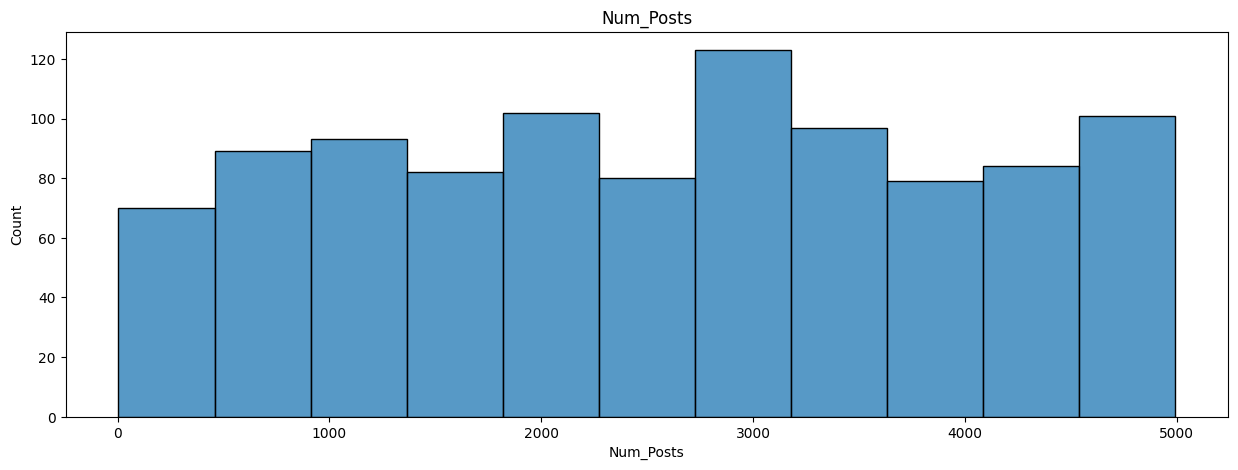

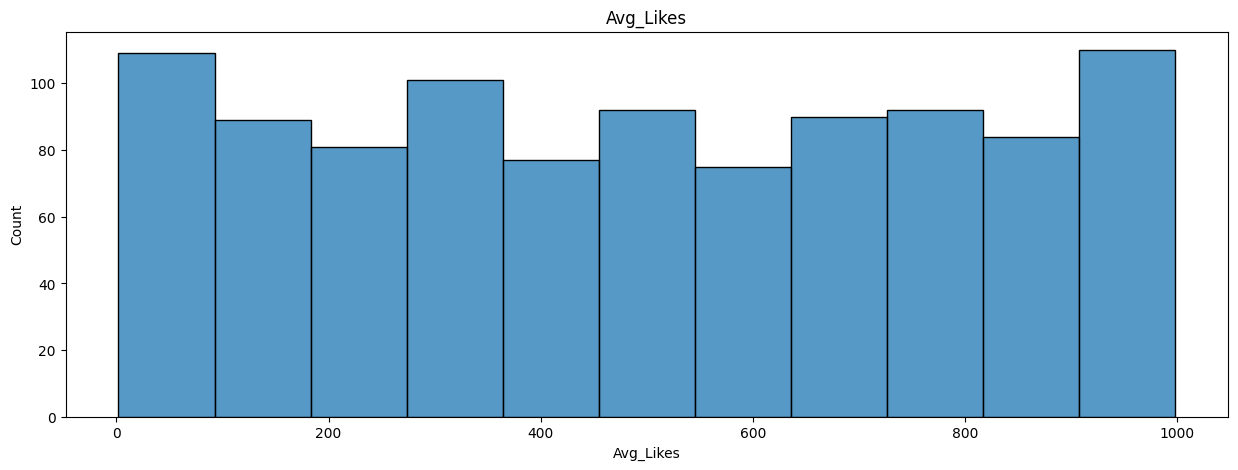

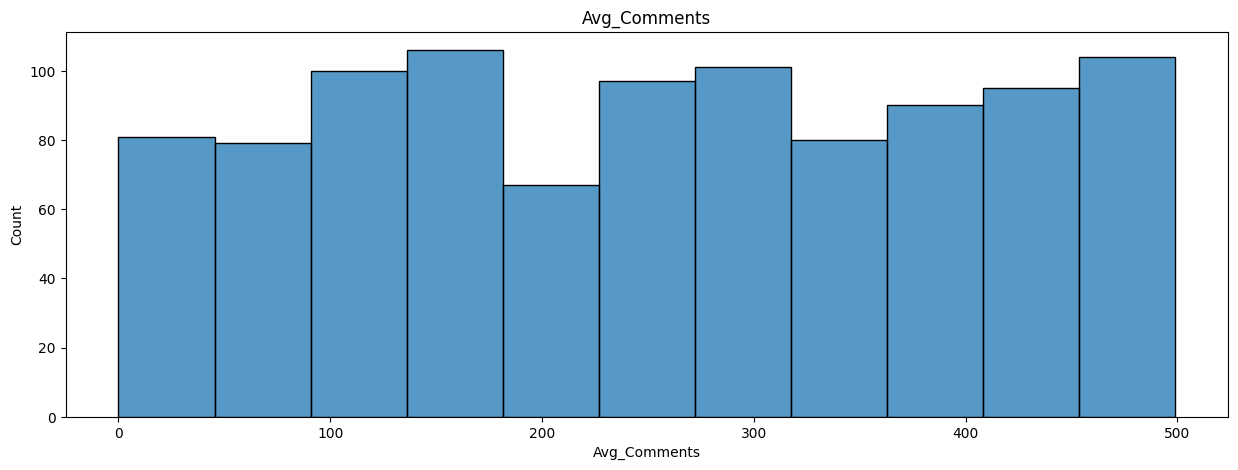

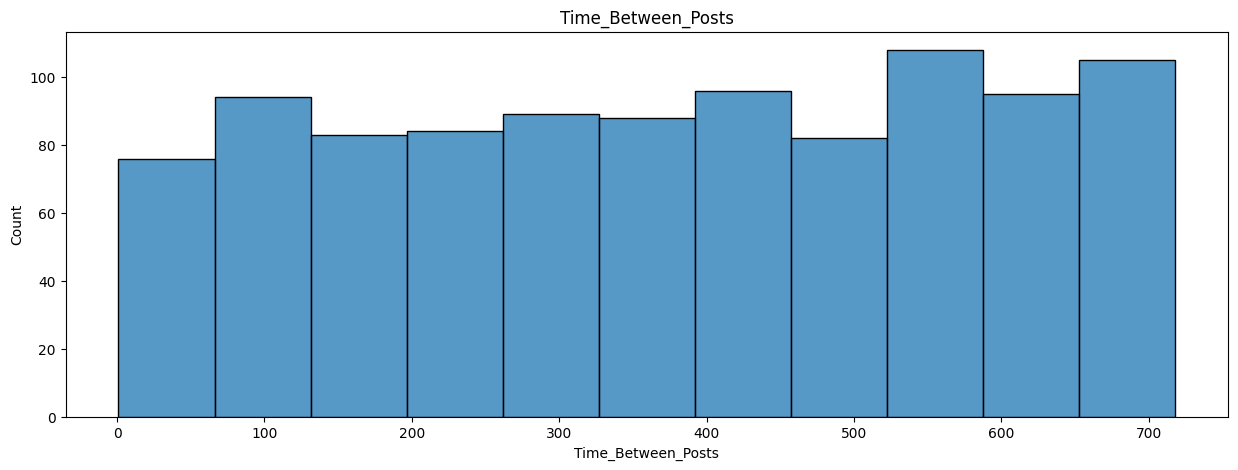

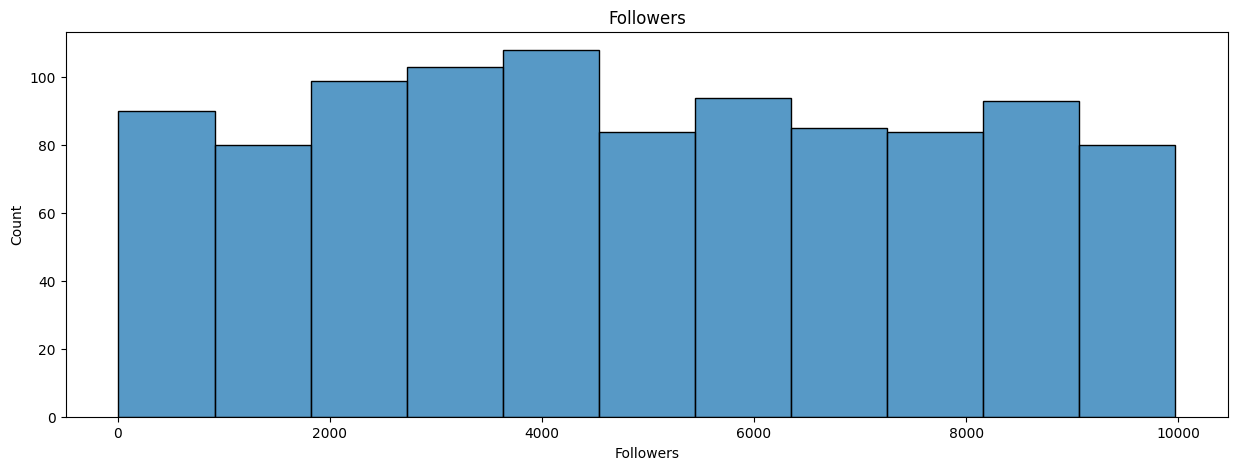

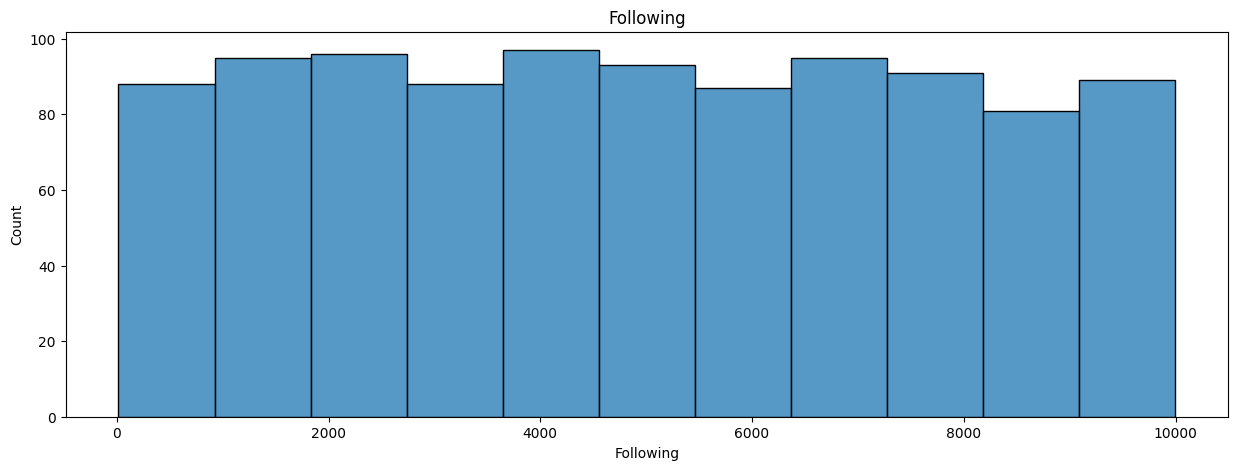

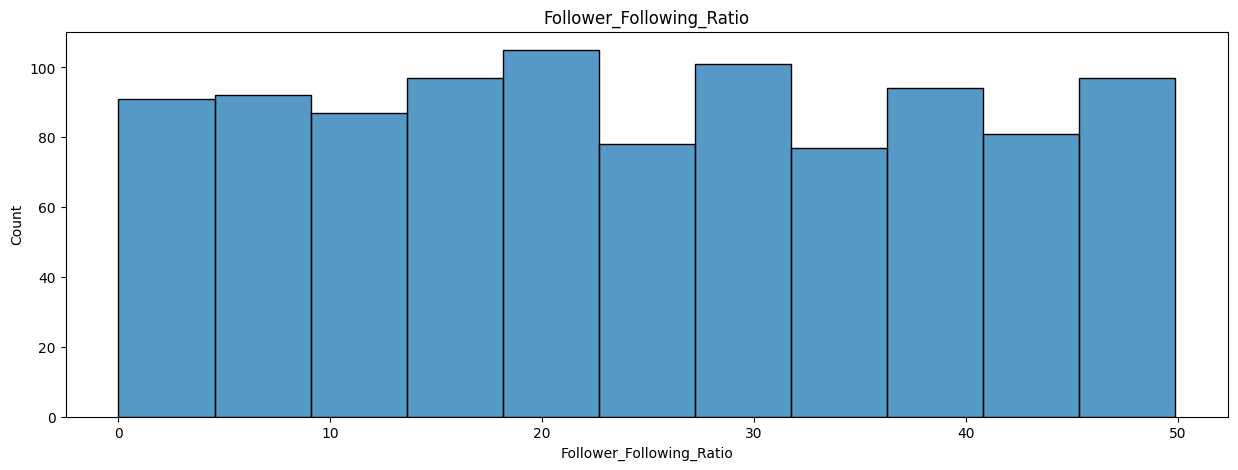

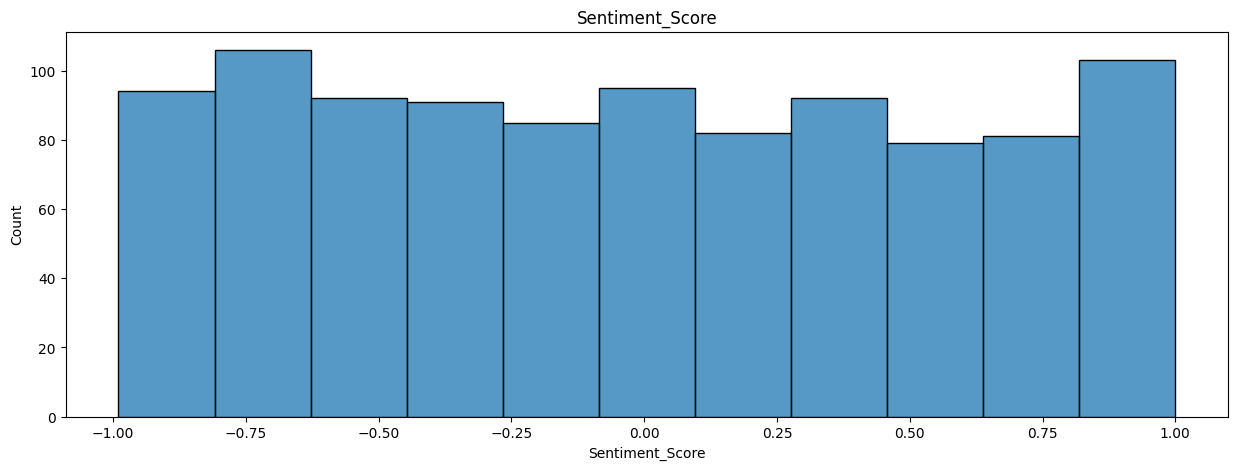

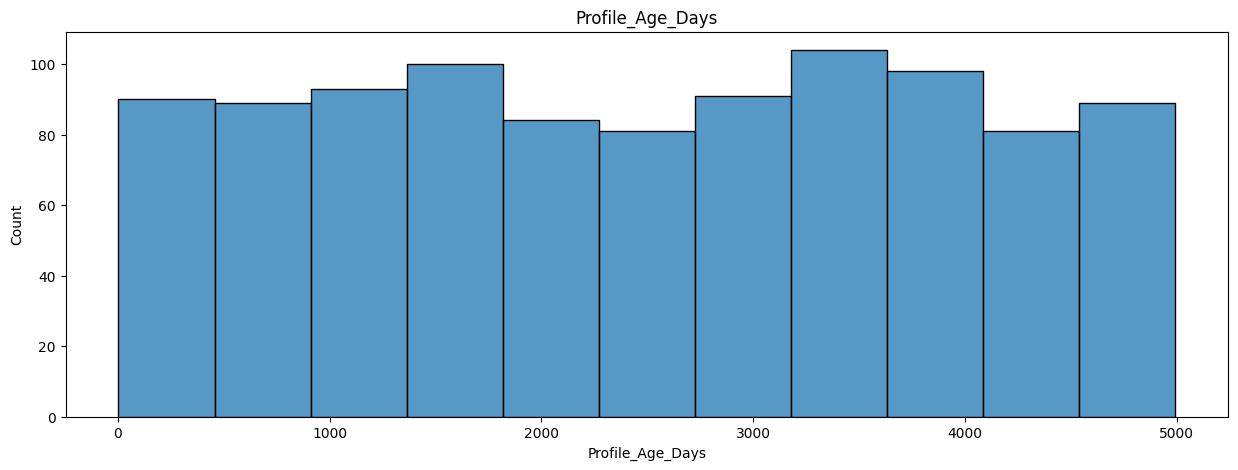

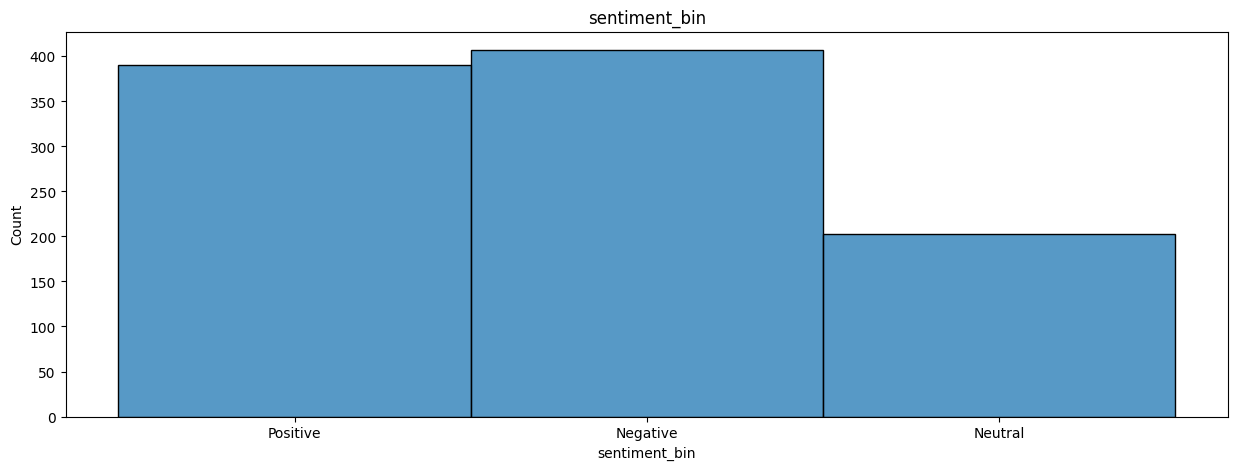

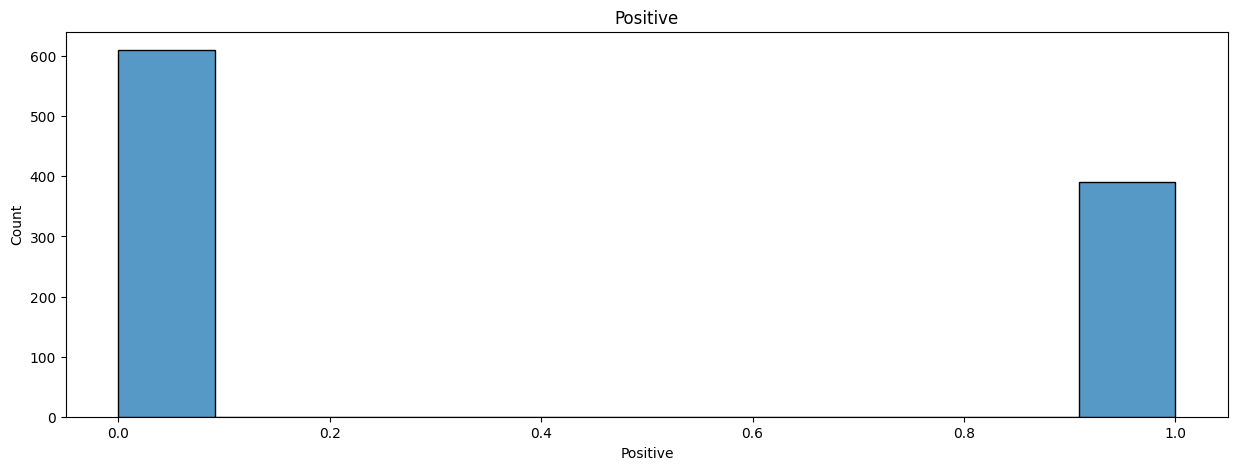

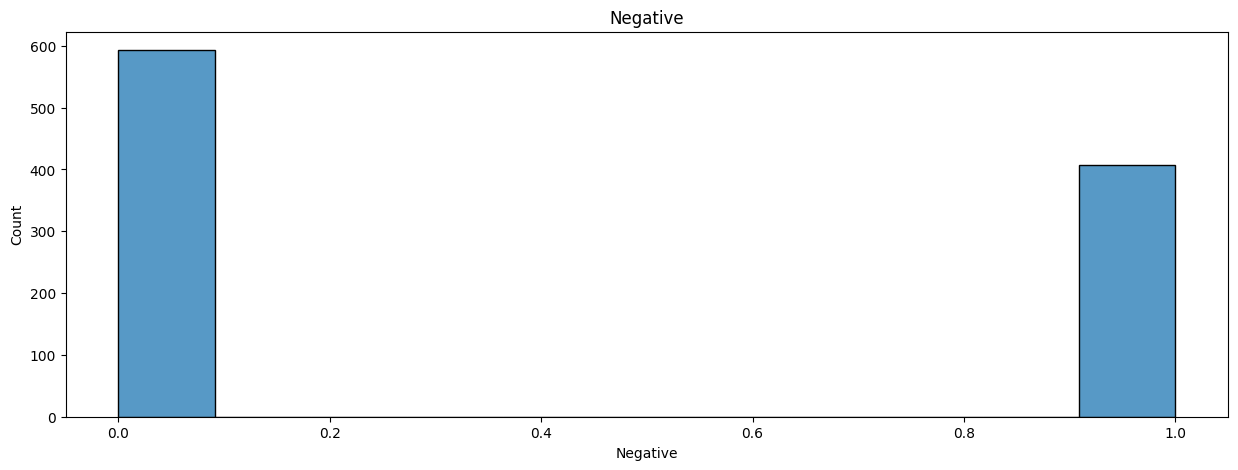

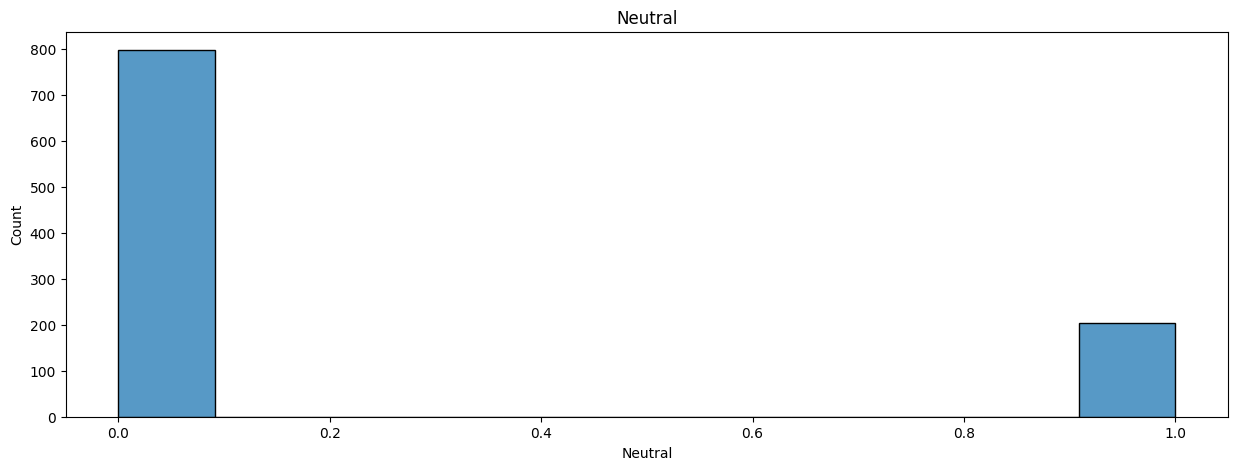

In [19]:
import seaborn as sns
for col in df.columns:
    plt.figure(figsize=(15, 5))
    sns.histplot(x=df[col])
    plt.title(col)
    plt.show()

# Telltale signs of a bot

In [20]:
df["Time_Between_Posts"].describe()

count    1000.000000
mean      374.505000
std       206.491062
min         1.000000
25%       195.750000
50%       381.000000
75%       559.000000
max       718.000000
Name: Time_Between_Posts, dtype: float64

having a minimum of 1 time unit between posts is suspicious, so we will raise a flag for it

In [21]:
df["flag_time_between_posts"] = df["Time_Between_Posts"] < 2
df["flag_time_between_posts"].value_counts()

flag_time_between_posts
False    997
True       3
Name: count, dtype: int64

In [22]:
df["Followers"].describe(), df["Following"].describe(), df["Follower_Following_Ratio"].describe()

(count    1000.00000
 mean     4891.01800
 std      2822.18845
 min         7.00000
 25%      2590.50000
 50%      4777.50000
 75%      7299.50000
 max      9973.00000
 Name: Followers, dtype: float64,
 count    1000.000000
 mean     4927.278000
 std      2870.084805
 min        16.000000
 25%      2413.750000
 50%      4828.500000
 75%      7386.250000
 max      9998.000000
 Name: Following, dtype: float64,
 count    1000.000000
 mean       24.752084
 std        14.324571
 min         0.012400
 25%        12.330975
 50%        24.222450
 75%        37.211875
 max        49.887500
 Name: Follower_Following_Ratio, dtype: float64)

if you have very few followers and you follow a lot of accounts, it is suspicious

In [23]:
df["Follower_Following_Ratio"].describe()

count    1000.000000
mean       24.752084
std        14.324571
min         0.012400
25%        12.330975
50%        24.222450
75%        37.211875
max        49.887500
Name: Follower_Following_Ratio, dtype: float64

In [24]:
(df["Followers"]/df["Following"]).describe()

count    1000.000000
mean        3.271435
std        11.831436
min         0.003063
25%         0.493234
50%         1.011836
75%         1.962433
max       212.523810
dtype: float64

they are not the same

IMPORTANT : THE FOLLOWER FOLLOWING RATIO COLUMN WAS CALCULATED WRONG

In [25]:
df["Follower_Following_Ratio"] = (df["Followers"]/df["Following"])

In [26]:
df["flag_follow"] = (df["Following"] > 1000) & (df["Follower_Following_Ratio"] < 0.2)
df["flag_follow"].value_counts()

flag_follow
False    907
True      93
Name: count, dtype: int64

In [27]:
df["avg_posts_per_day"] = df["Num_Posts"] / df["Profile_Age_Days"]
df["avg_posts_per_day"].describe()

count    1000.000000
mean        3.467033
std        15.017654
min         0.001608
25%         0.541502
50%         1.034049
75%         1.960316
max       300.600000
Name: avg_posts_per_day, dtype: float64

if your average number of posts per day is more than 100, it is an obvious sign of a bot

In [28]:
df["flag_posts"] = df["avg_posts_per_day"] > 15
df["flag_posts"].value_counts()

flag_posts
False    967
True      33
Name: count, dtype: int64

In [29]:
df["avg_likes_per_day"] = df["Avg_Likes"] / df["Profile_Age_Days"]
df["flag_likes"] = df["avg_likes_per_day"] > 70
df["flag_likes"].value_counts()

flag_likes
False    998
True       2
Name: count, dtype: int64

if too many likes per day, it is suspicious

In [30]:
df["avg_comments_per_day"] = df["Avg_Comments"] / df["Profile_Age_Days"]
df["flag_comments"] = df["avg_comments_per_day"] > 50
df["flag_comments"].value_counts()

flag_comments
False    999
True       1
Name: count, dtype: int64

In [31]:
flag_cols = [col for col in df.columns if "flag_" in col]
flag_cols

['flag_time_between_posts',
 'flag_follow',
 'flag_posts',
 'flag_likes',
 'flag_comments']

## Classifying into bot, influencer, normal

In [32]:
df["bot"] = df[flag_cols[0]] | df[flag_cols[1]]
for col in flag_cols[2:]:
    df["bot"] = df["bot"] | df[col]
df["bot"].value_counts()

bot
False    875
True     125
Name: count, dtype: int64

In [33]:
df["Followers"].describe()

count    1000.00000
mean     4891.01800
std      2822.18845
min         7.00000
25%      2590.50000
50%      4777.50000
75%      7299.50000
max      9973.00000
Name: Followers, dtype: float64

In [34]:
df["influencer"] = (df["Followers"] > 6000) & ~df["bot"]
df["influencer"].value_counts()

influencer
False    633
True     367
Name: count, dtype: int64

In [35]:
df["normal"] = ~df["bot"] & ~df["influencer"]
df["normal"].value_counts()

normal
True     508
False    492
Name: count, dtype: int64

In [36]:
df["type"] = pd.Series(index=df.index.copy(), data=["bot" if df["bot"].iloc[i] else ("influencer" if df["influencer"].iloc[i] else "normal") for i in range(len(df))], dtype="category")

df["type"].value_counts()

type
normal        508
influencer    367
bot           125
Name: count, dtype: int64

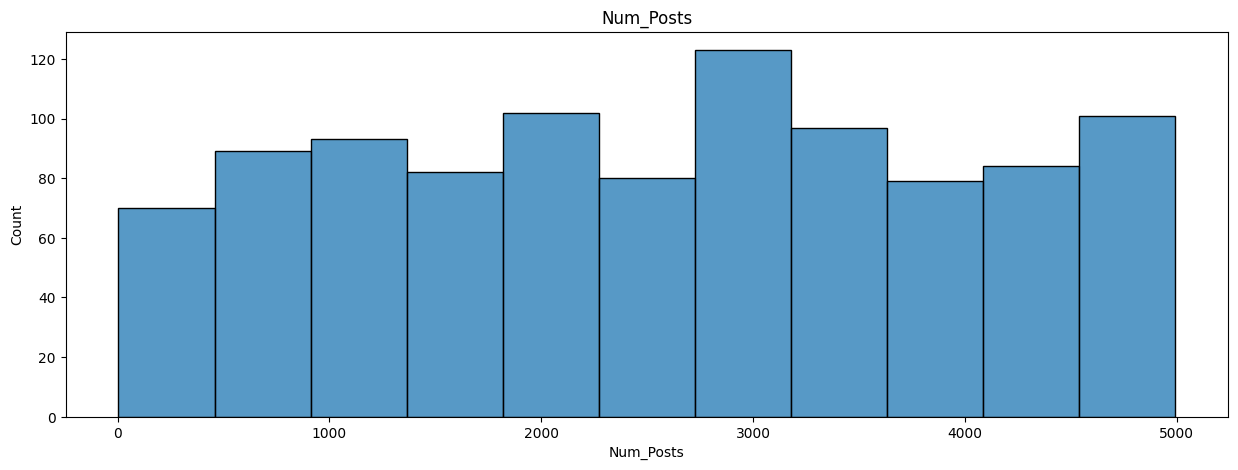

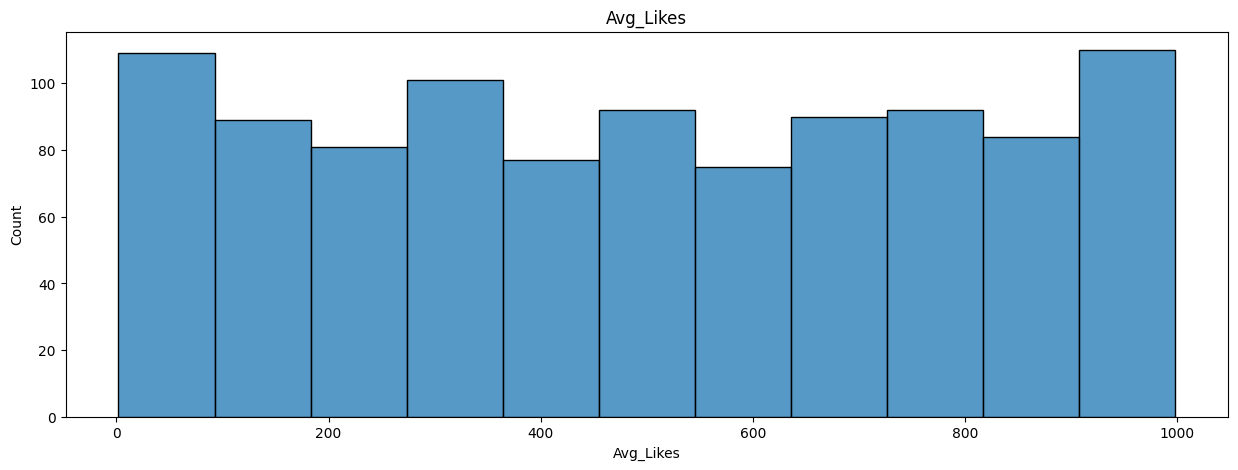

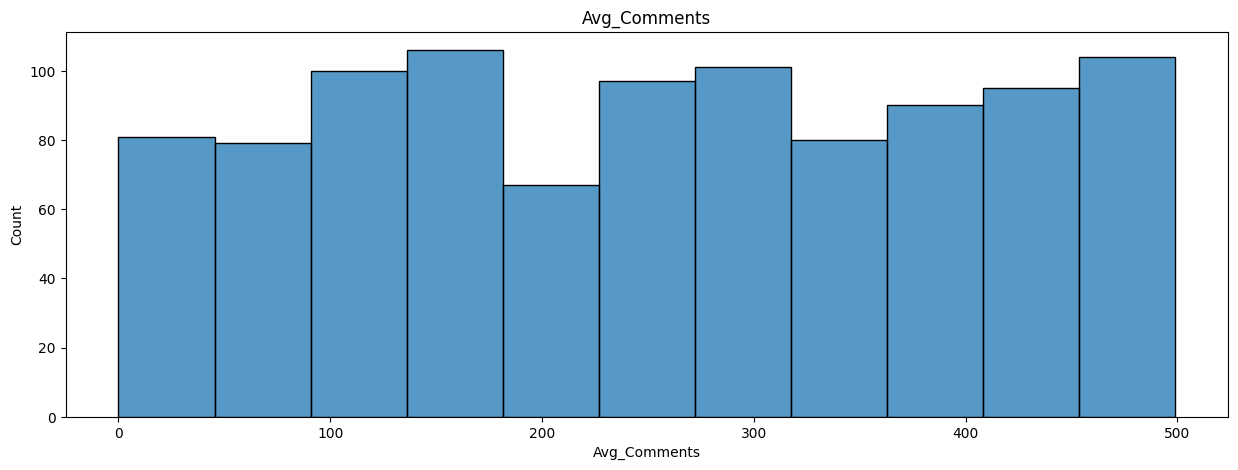

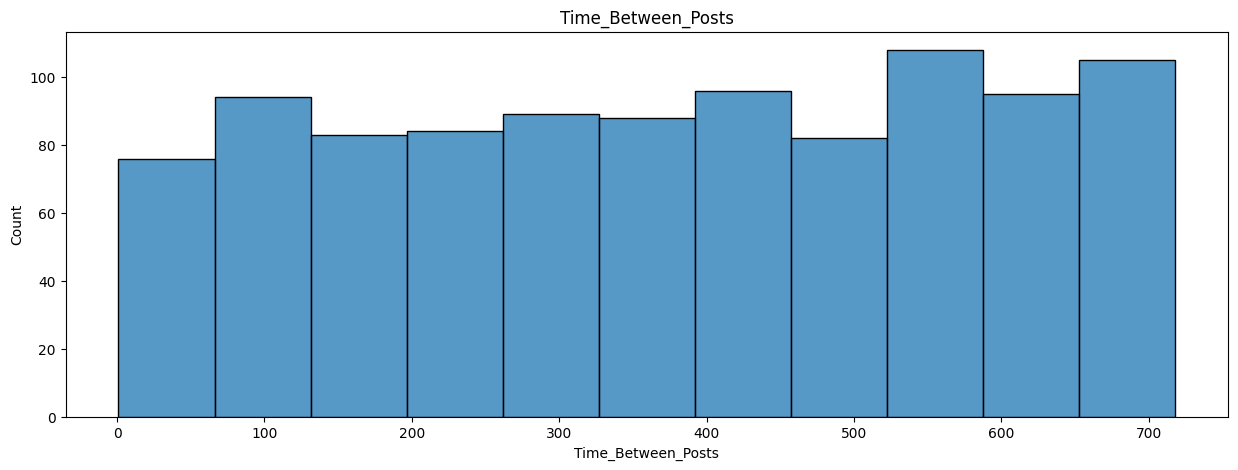

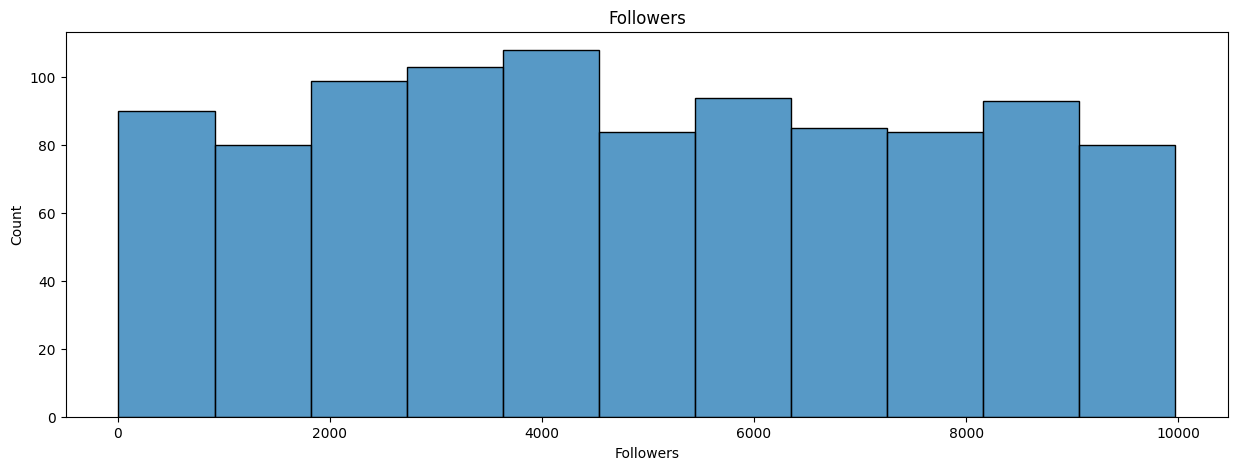

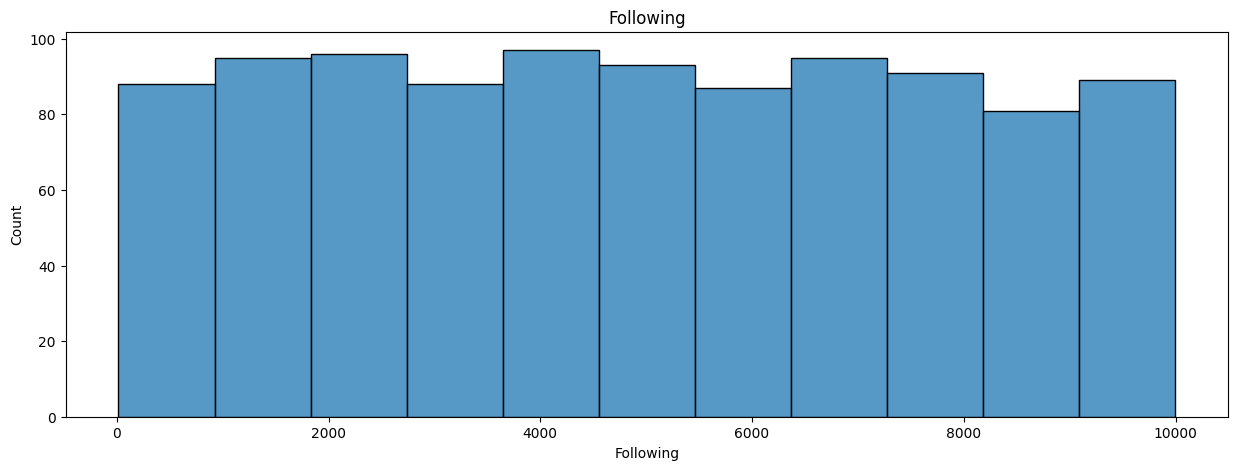

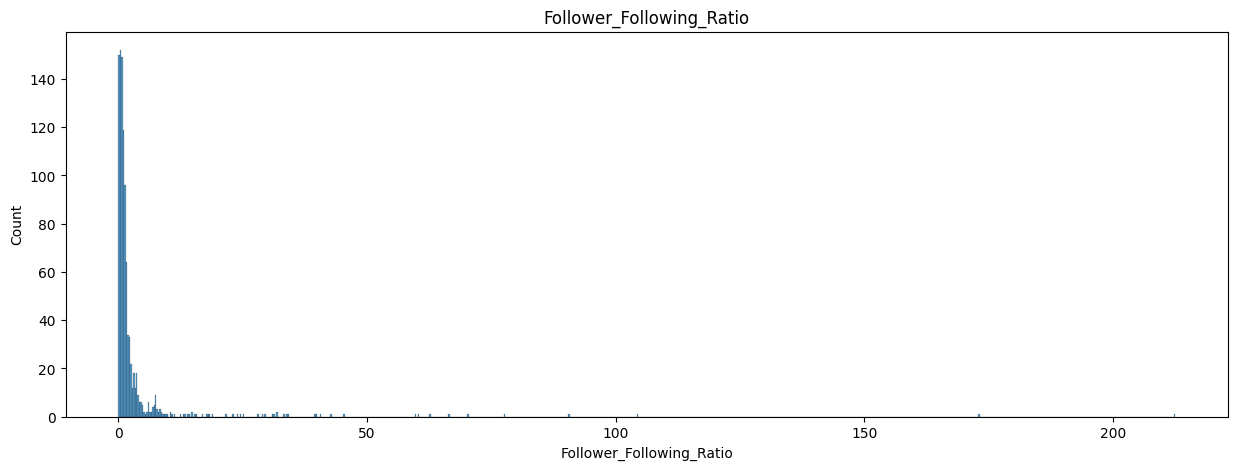

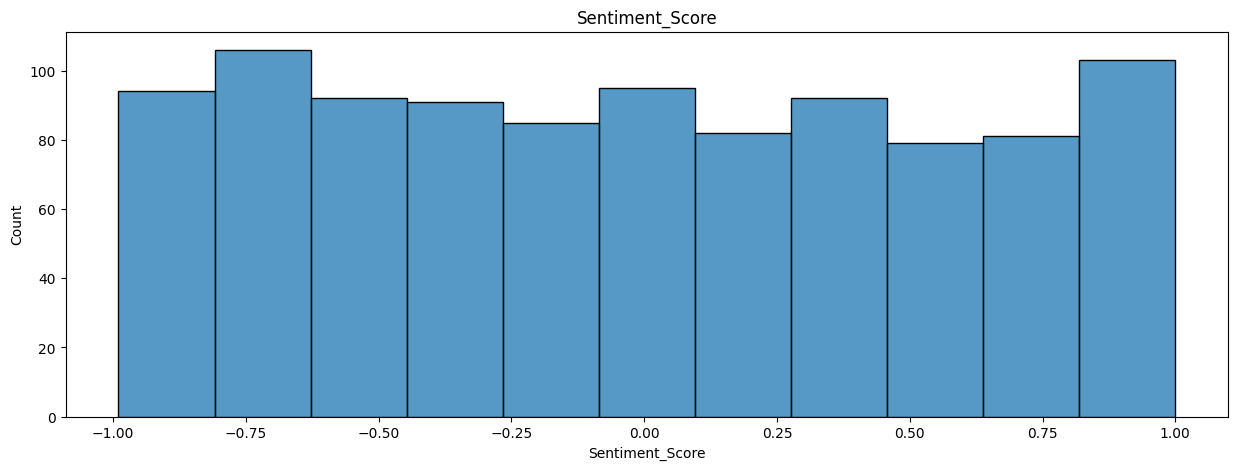

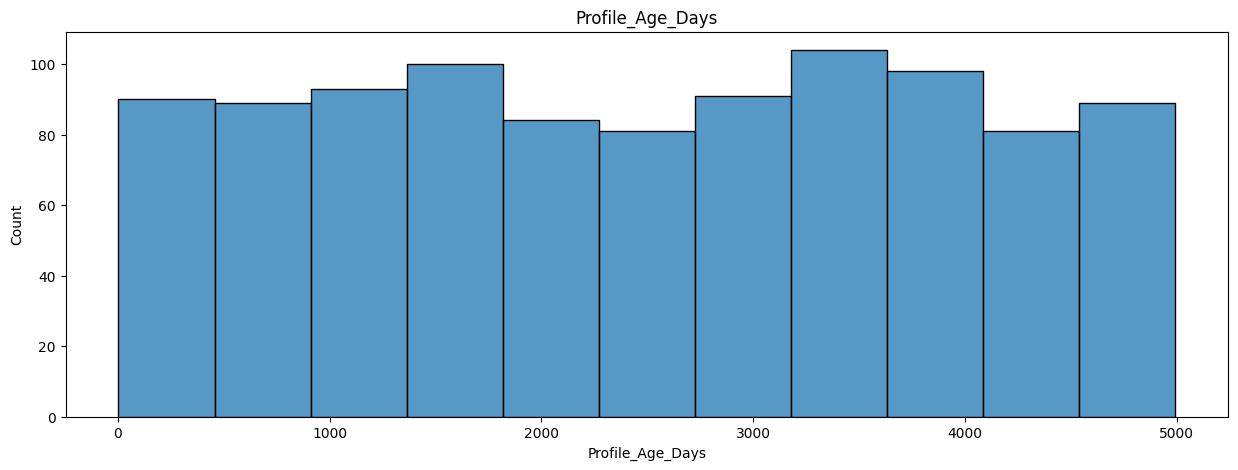

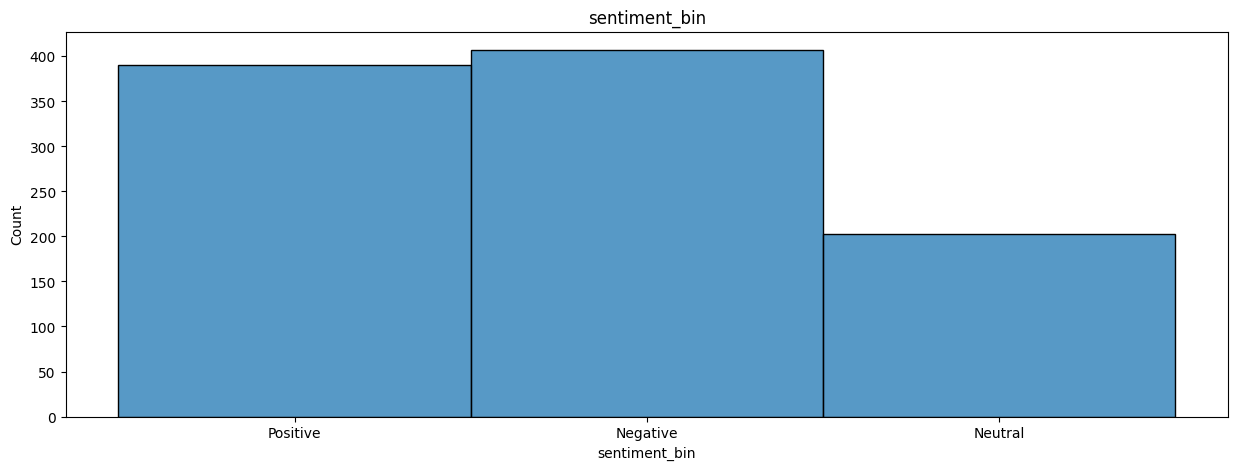

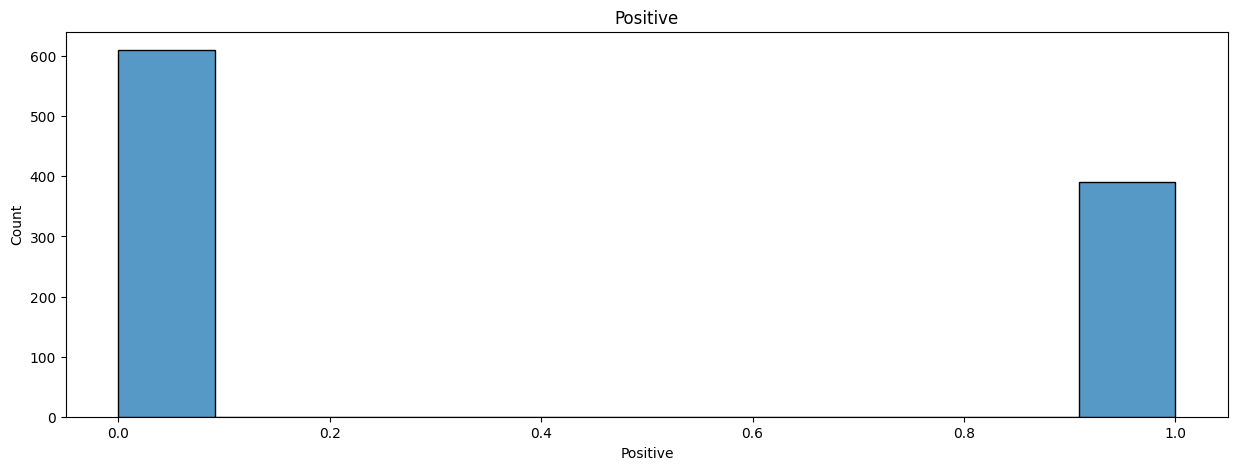

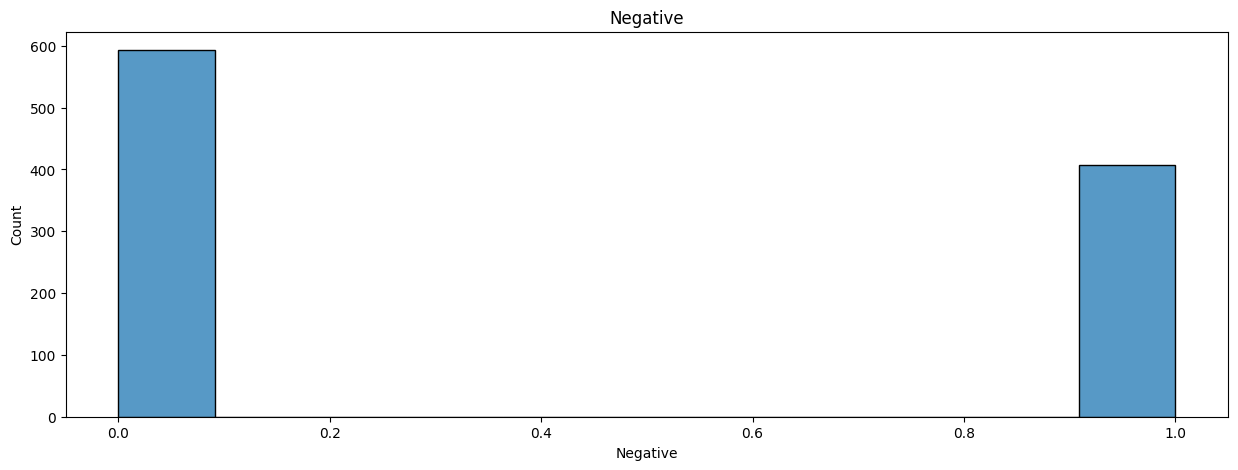

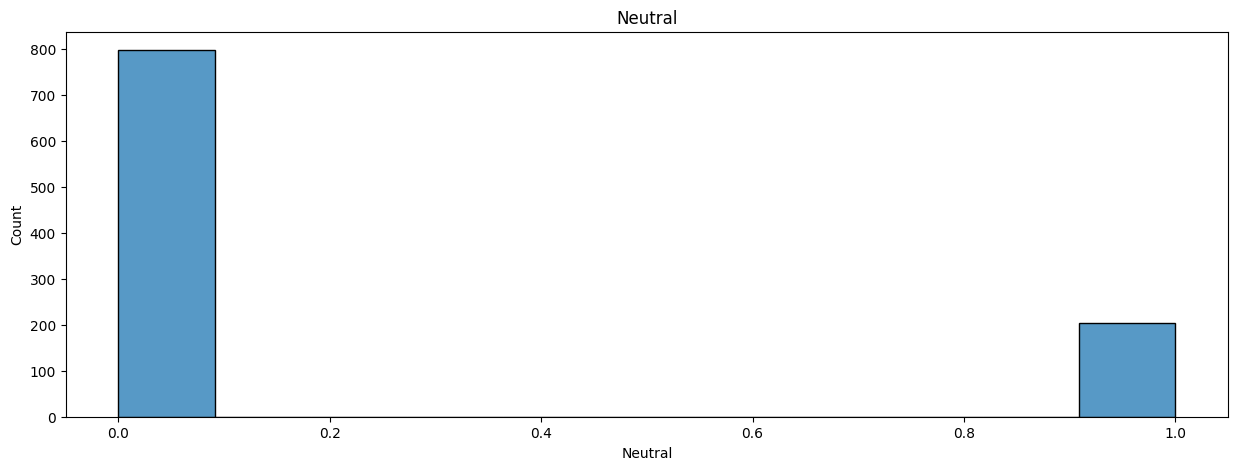

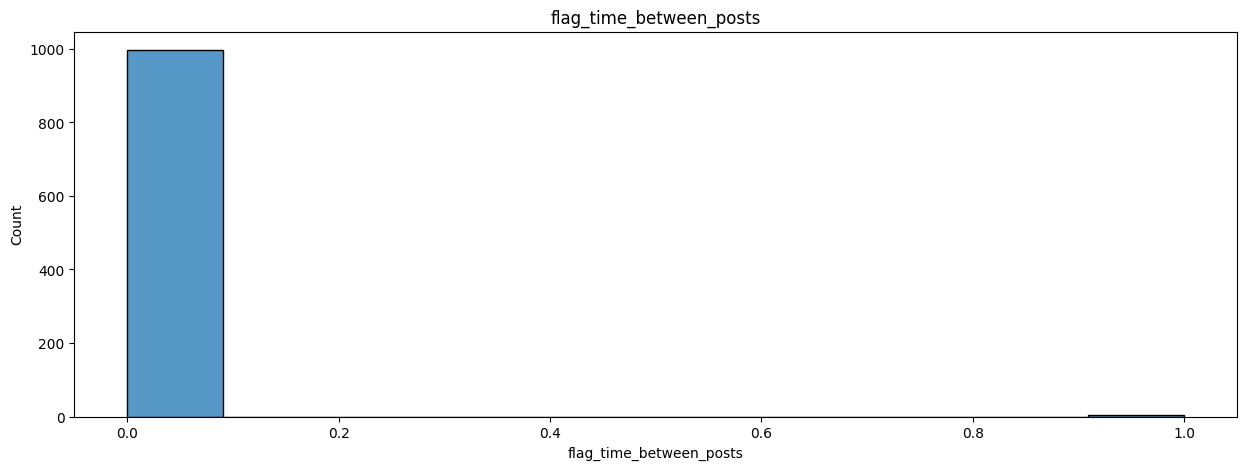

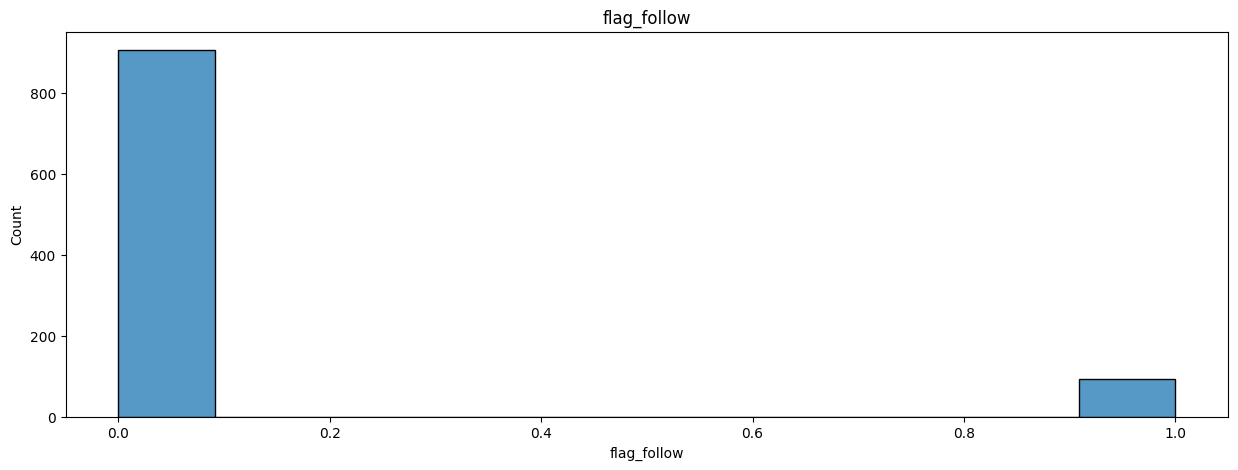

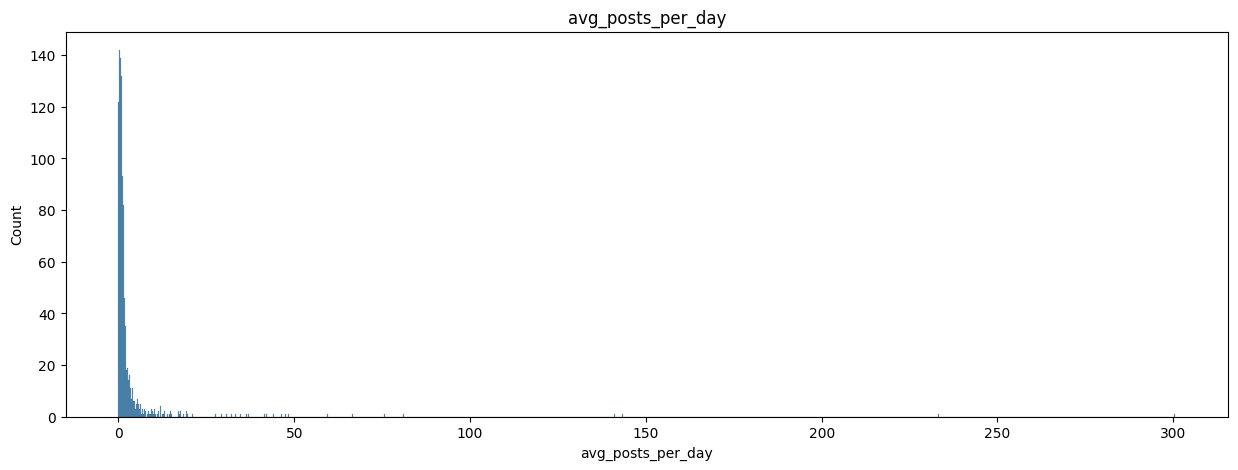

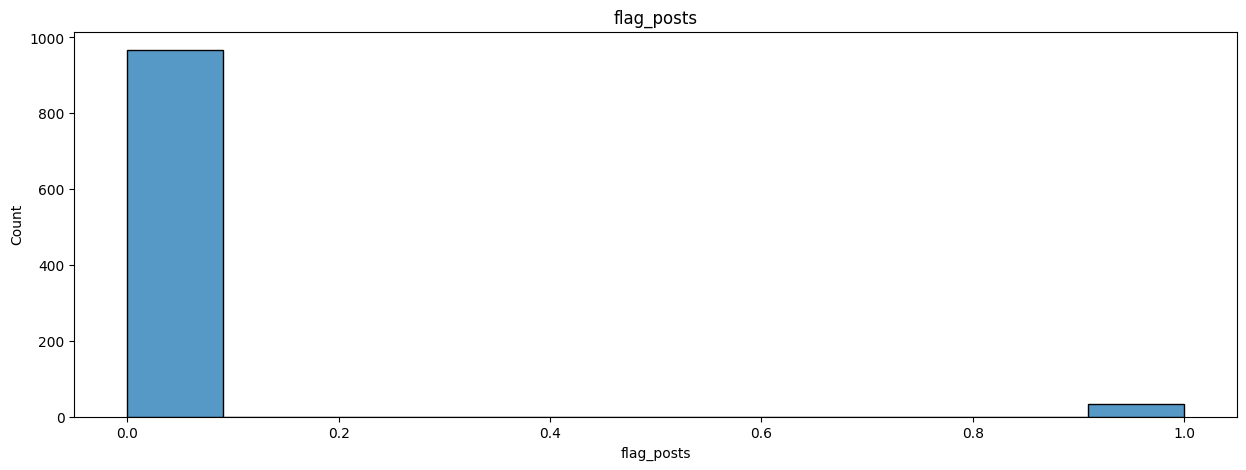

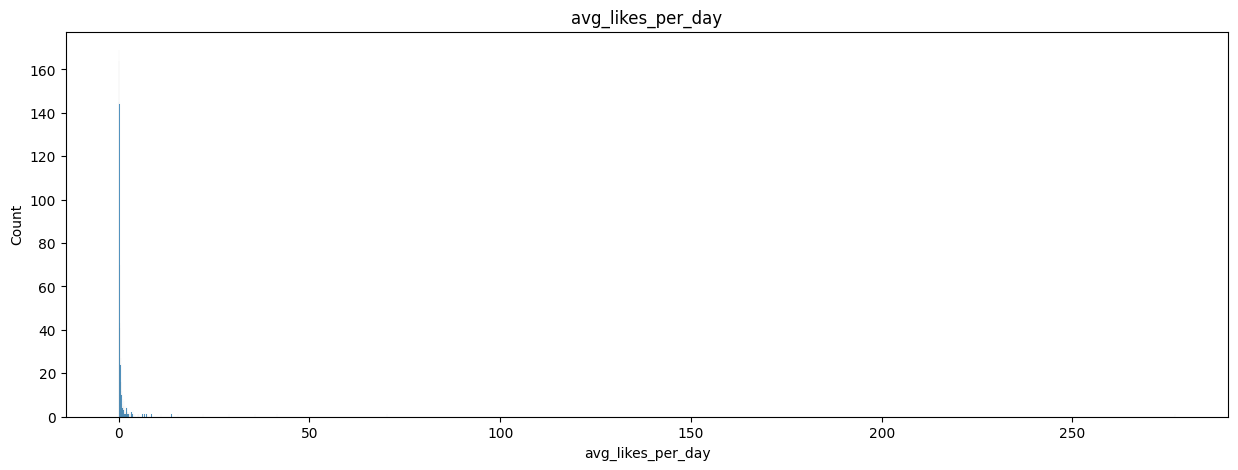

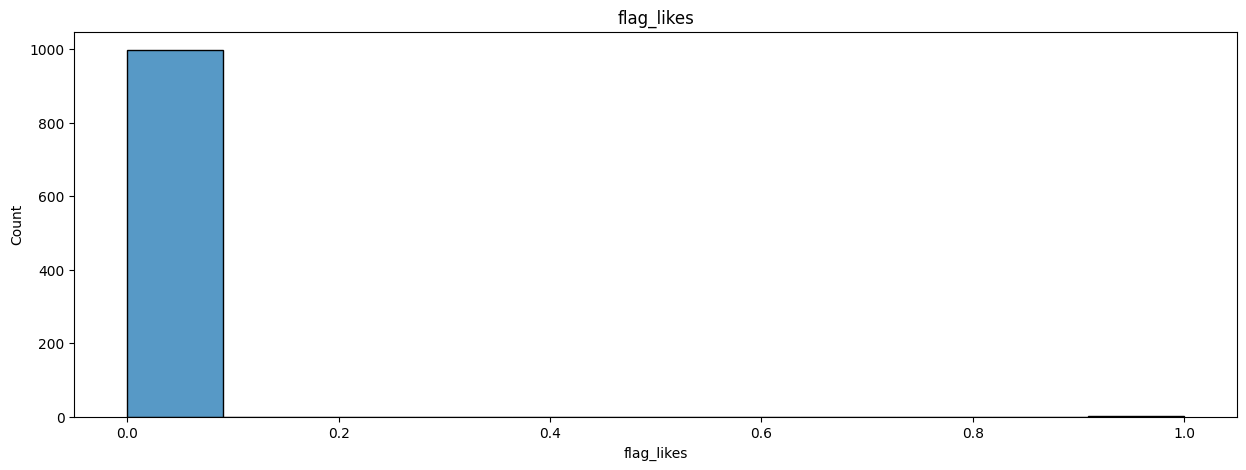

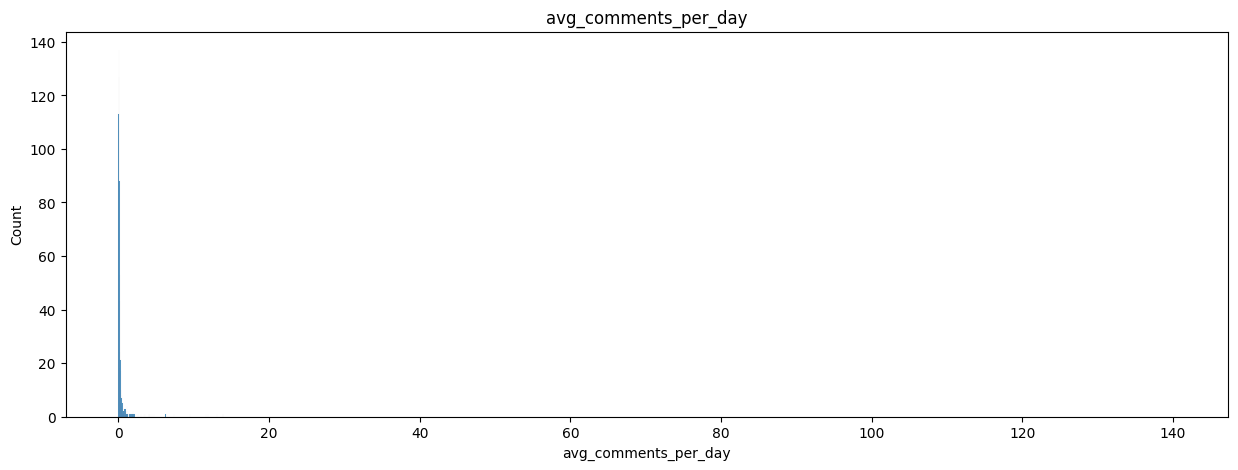

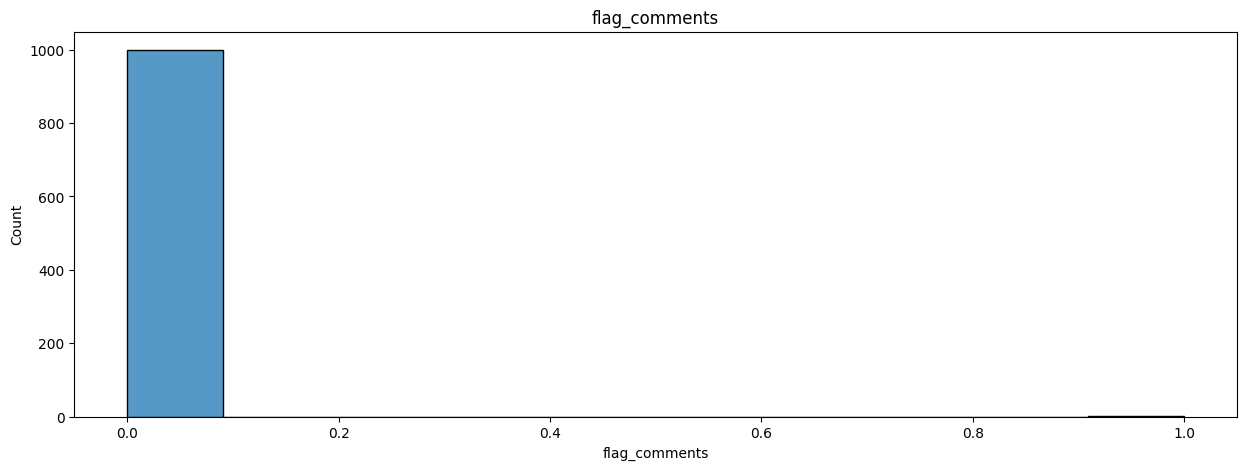

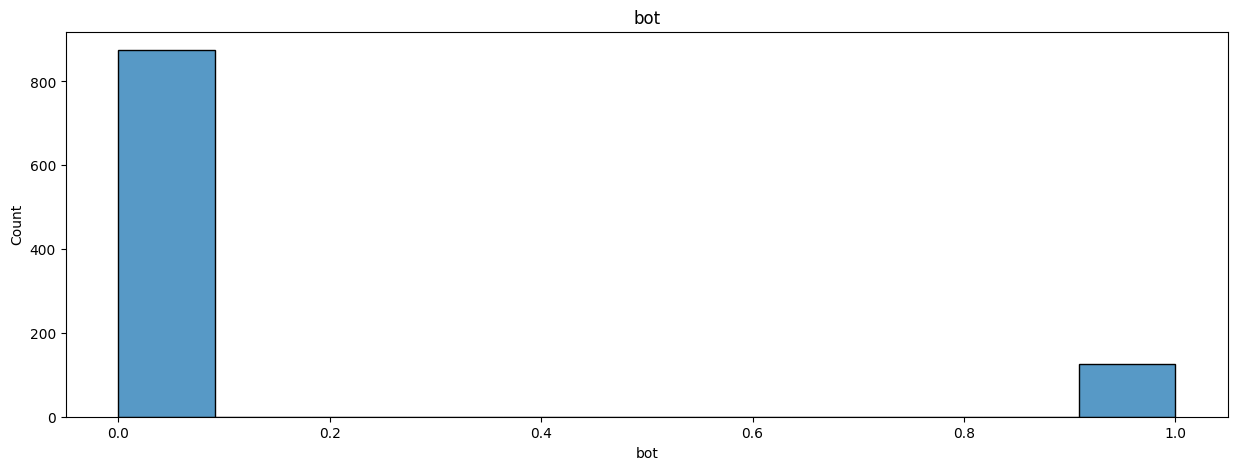

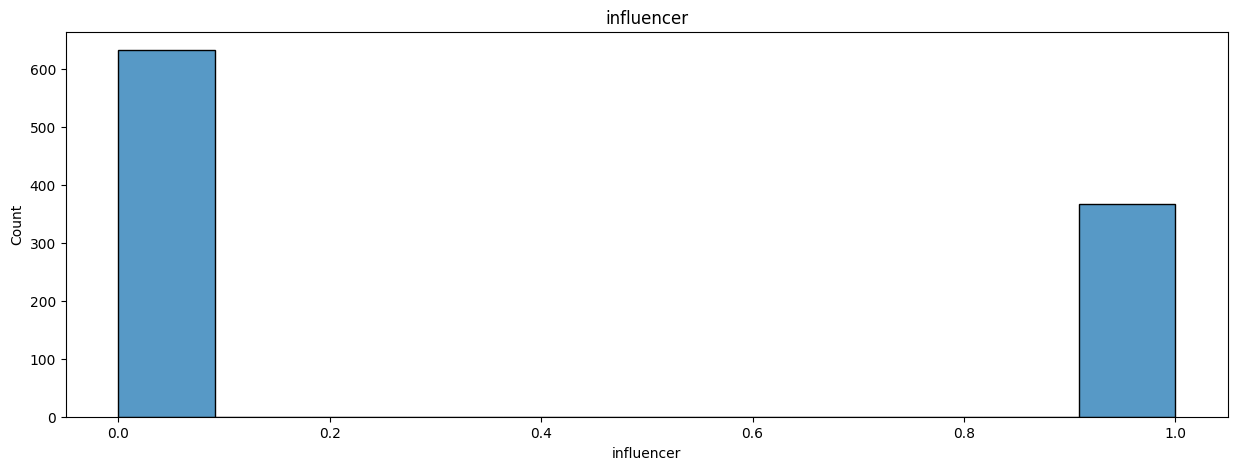

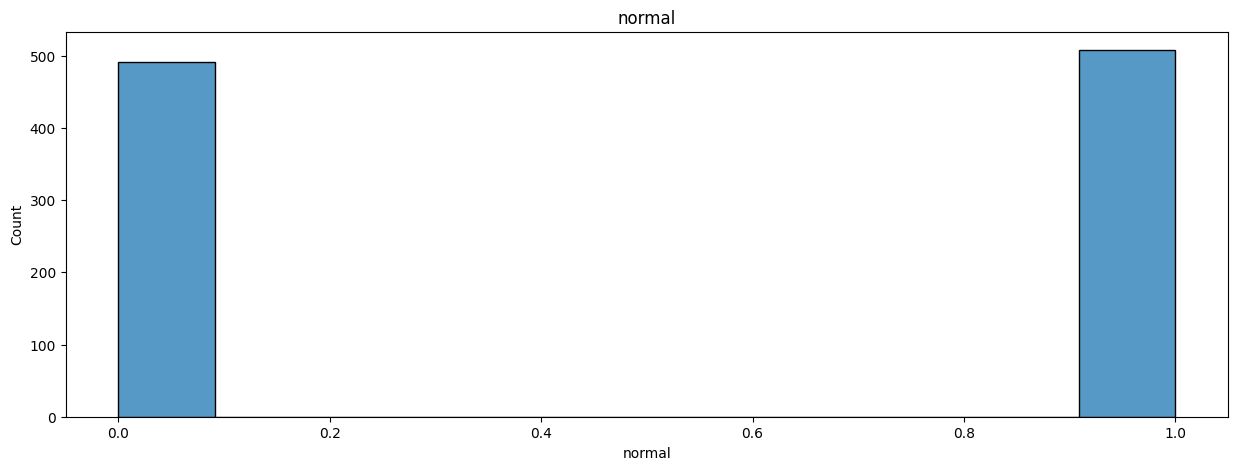

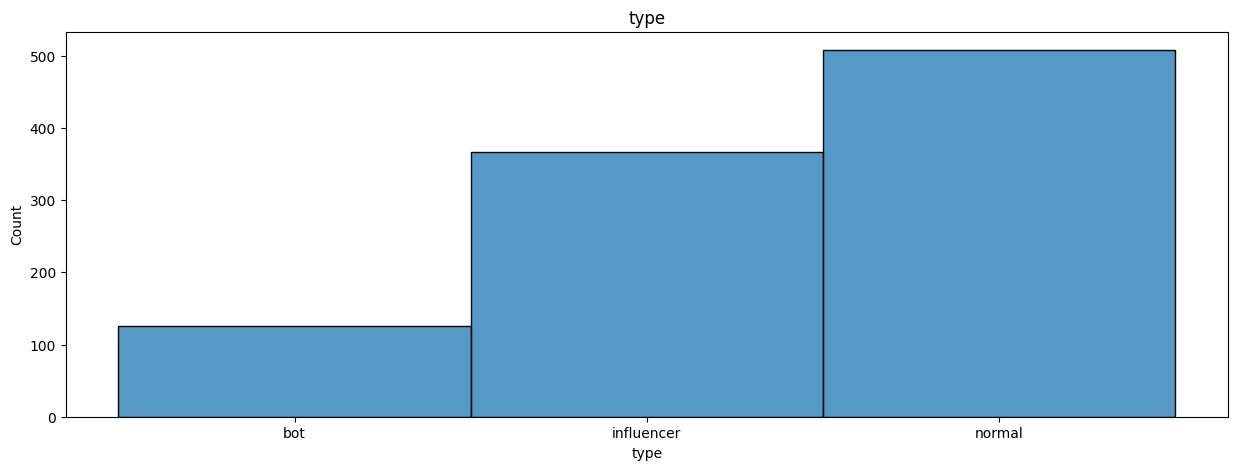

In [37]:
for col in df.columns:
    if col != "User_ID":
        plt.figure(figsize=(15, 5))
        sns.histplot(x=df[col])
        plt.title(col)
        plt.show()

In [38]:
df.to_csv("transformed.csv")